## 🧠 Step 1: Import Required Libraries

Let's start by importing all the necessary Python libraries for this project. We'll need tools for data manipulation, visualization, audio feature extraction, model training, and evaluation.


In [1]:
import os
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


## 🎵 Step 2: Set Dataset Path and Genres
Here we define the path to our GTZAN dataset and list of genres we're going to classify. Each genre has 100 audio files (30 seconds long) in `.wav` format.


In [2]:
DATASET_PATH = "/content/drive/MyDrive/Data/genres_original"
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()


## 🔍 Step 3: Extract Features from Audio Files
We're going to extract meaningful features from each audio file. We'll use MFCCs (Mel-Frequency Cepstral Coefficients), which are widely used in audio processing and represent timbral texture.


In [3]:
def extract_features(file_path):
    y, sr = librosa.load(file_path, duration=30)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfccs_scaled = np.mean(mfccs.T, axis=0)
    return mfccs_scaled


## 🧪 Step 4: Loop Through Files and Create Dataset
Now we loop through each genre folder, extract features from every audio file, and store them along with their corresponding genre label.


In [5]:
features = []
labels = []

for genre in genres:
    genre_path = os.path.join(DATASET_PATH, genre)
    for file_name in os.listdir(genre_path):
        if file_name.endswith('.wav'):
            file_path = os.path.join(genre_path, file_name)
            try:
                data = extract_features(file_path)
                features.append(data)
                labels.append(genre)
            except Exception as e:
                print(f"❌ Could not process {file_path}: {e}")


❌ Could not process /content/drive/MyDrive/Data/genres_original/jazz/jazz.00054.wav: 


In [7]:
df = pd.DataFrame(features)
df['label'] = labels
print("✅ Feature extraction complete.")

✅ Feature extraction complete.


## 📊 Step 5: Quick Look at the Dataset
Let's take a quick look at the dataset to understand the shape and distribution of our genres.


In [8]:
print(df.shape)
df.head()


(999, 41)


,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,label
0,-121.387115,122.505394,-14.739394,46.135296,-8.160384,20.170509,-19.169321,23.050188,-11.825940,21.173410,...,-1.404135,-1.881617,-1.810887,2.364886,-4.303409,-3.878964,-5.098445,0.491603,1.165389,blues
1,-179.420074,136.442093,-26.644339,39.979591,5.301815,10.921237,-20.555347,8.507477,-11.354360,-3.469098,...,2.700859,-0.170255,-2.520090,-3.451468,-2.884889,0.731358,-1.944596,-4.865746,-3.238097,blues
2,-190.175018,130.292419,-36.348473,33.029091,11.085681,-0.596373,-20.882357,0.277116,-6.500871,-5.515623,...,2.959226,2.607564,1.799320,-1.978903,-5.175632,-2.376010,0.142230,3.708780,5.259211,blues
3,-177.888763,118.189529,-17.550728,30.753101,-21.732107,11.898545,-20.732281,3.176169,-8.575771,-0.940185,...,-4.352427,-6.809110,-2.911618,-1.063121,1.908480,1.015506,-3.108647,-5.304875,-5.263715,blues
4,-160.291855,126.195763,-35.602501,22.151169,-32.487640,10.862023,-23.357162,0.500523,-11.804770,1.203877,...,3.641650,-3.004783,-6.107313,-6.952791,-4.075172,-1.136930,-0.484632,-4.788031,-3.219375,blues


## 📈 Step 6: Visualize Genre Distribution
Let’s make a bar plot showing how many samples we have per genre. Since the GTZAN dataset is balanced, we expect 100 samples for each genre.


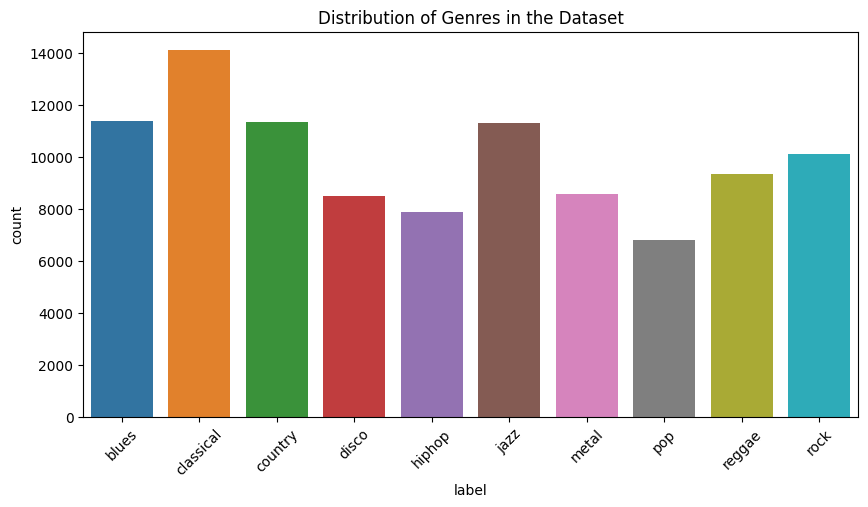

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='label', palette='tab10')
plt.title("Distribution of Genres in the Dataset")
plt.xticks(rotation=45)
plt.show()


## 🔢 Step 7: Encode Labels and Split Dataset
Before feeding data into the SVM model, we need to encode the genre labels into numerical format and split the data into training and testing sets.


In [10]:
X = df.drop('label', axis=1)
y = LabelEncoder().fit_transform(df['label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


Training samples: 799, Testing samples: 200


## 🧼 Step 8: Scale the Features
Standardization ensures all features are on the same scale, which is important for SVM to perform well.



In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🧠 Step 9: Train the SVM Classifier
Now, let's train a Support Vector Machine (SVM) classifier using the RBF kernel. This kernel is effective in many high-dimensional problems like ours.


In [12]:
svm_model = SVC(kernel='rbf', C=10, gamma='scale')
svm_model.fit(X_train_scaled, y_train)


SVC(C=10)

## 🧪 Step 10: Evaluate the Model
After training, we evaluate how well the model performs on unseen data. We'll print the accuracy score and classification report.


In [13]:
y_pred = svm_model.predict(X_test_scaled)
print(f"✅ Accuracy Score: {accuracy_score(y_test, y_pred):.4f}")
print("\n📄 Classification Report:\n")
print(classification_report(y_test, y_pred))


✅ Accuracy Score: 0.6300

📄 Classification Report:

              precision    recall  f1-score   support

           0       0.57      0.65      0.60        20
           1       0.74      1.00      0.85        20
           2       0.46      0.55      0.50        20
           3       0.64      0.35      0.45        20
           4       0.62      0.50      0.56        20
           5       0.75      0.60      0.67        20
           6       0.82      0.90      0.86        20
           7       0.76      0.80      0.78        20
           8       0.65      0.75      0.70        20
           9       0.24      0.20      0.22        20

    accuracy                           0.63       200
   macro avg       0.62      0.63      0.62       200
weighted avg       0.62      0.63      0.62       200



## 🧱 Step 11: Confusion Matrix
Let’s plot a confusion matrix to visually inspect where the model is confusing between genres.


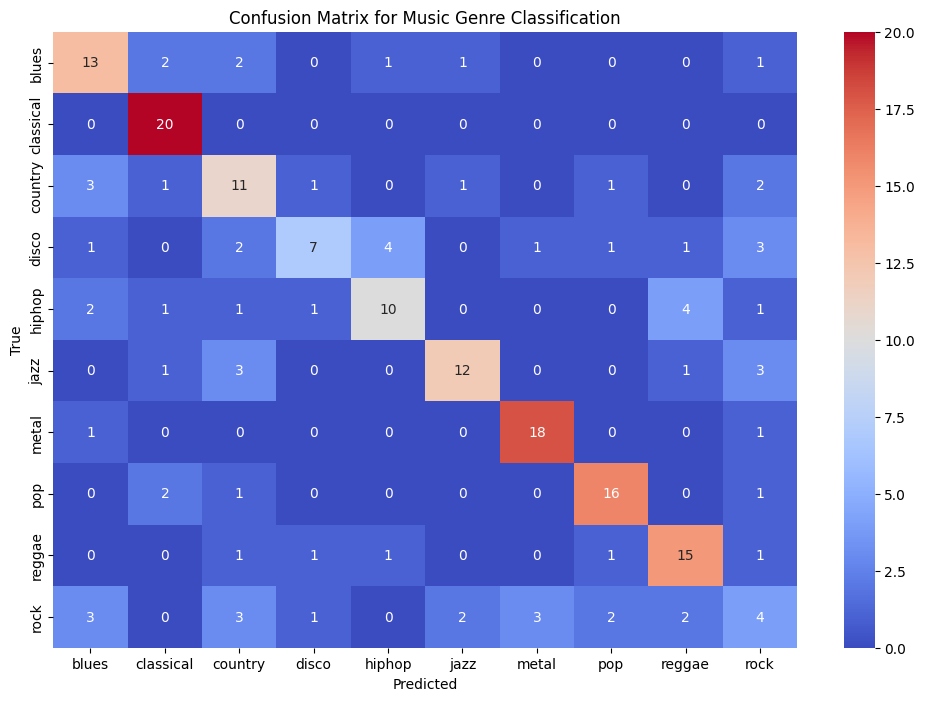

In [15]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=genres, yticklabels=genres, cmap="coolwarm")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix for Music Genre Classification")
plt.show()


## 💾 Step 12: Save the Model and Scaler
Let’s save the trained model and scaler for future predictions or deployment.


In [16]:
import joblib

joblib.dump(svm_model, "svm_genre_model.pkl")
joblib.dump(scaler, "scaler.pkl")
print("✅ Model and scaler saved.")


✅ Model and scaler saved.
